
# Project: Investigate a Dataset - [TMDB movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Dataset Description

This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
It collects info about movies based on parameters below:
1. ID & Tmdb_id: identification number of the movies
2. Popularity & Release year
3. Budget & Revenue : is the budgeted amount for the movie and also revenue of each movie.
4. Genres, Cast, Title, Production Companies, Homepage, Director, Tagline, Overview.
5. Average vote & Vote Count
6. Budget_adj & Revenue_adj: the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

# Questions for Analysis

1. Does Runtime have effect on Movie Budget.
2. What is the relationship between budget and revenue 
3. Top years with highest movie revenue
4. Genres with the most profit.
5. Relationship betweeen movie popularity and revenue
6. How high/low is budget/revenue at the time of movie production compared to 2010 dollar rate.
7. Top/Least ten Movies with most/least vote count.
8. Top/Least ten Movies with highest/lowest ratings(vote average).
9. Most/Least popular Movies
10. Years with highest/Least movie release. 




In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()
# loads the dataset and also check the first 5 rows of the dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

# Wrangling steps
1. Check the column names and data types
2. Check for duplicate rows
3. Check summary statistics
4. Check zero values for numerical columns
5. Check null values
6. Check categorical columns value counts

In [3]:
df.sample(5)
# gives a sneak peak of the movie dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2890,11253,tt0411477,2.188028,85000000,160388063,Hellboy II: The Golden Army,Ron Perlman|Selma Blair|Jeffrey Tambor|Doug Jo...,NaN,Guillermo del Toro,Saving the world is a hell of a job.,...,In this continuation to the adventure of the d...,120,Adventure|Fantasy|Science Fiction,Universal Pictures|Dark Horse Entertainment|La...,7/11/08,927,6.4,2008,8.608686e+07,1.624389e+08
4628,84329,tt1990314,0.380291,2500000,3325038,Robot & Frank,Frank Langella|Liv Tyler|James Marsden|Susan S...,http://robotandfrank-film.com/,Jake Schreier,Friendship doesn't have an off switch,...,"A delightful dramatic comedy, a buddy picture,...",85,Science Fiction|Comedy|Drama|Crime,Samuel Goldwyn Films|Stage 6 Films|Park Pictur...,8/16/12,307,6.7,2012,2.374361e+06,3.157936e+06
8384,1103,tt0082340,1.003963,6000000,50000000,Escape from New York,Kurt Russell|Lee Van Cleef|Ernest Borgnine|Don...,http://www.theofficialjohncarpenter.com/escape...,John Carpenter,1997. New York City is now a maximum security ...,...,"In 1997, the island of Manhattan has been wall...",99,Science Fiction|Action,AVCO Embassy Pictures|Goldcrest Films Internat...,5/22/81,336,6.5,1981,1.438914e+07,1.199095e+08
3317,19116,tt0804443,0.093841,22000000,0,Asylum,Sarah Roemer|Jake Muxworthy|Mark Rolston|Travi...,NaN,David R. Ellis,NaN,...,The teenager Madison McBride is traumatized by...,93,Horror|Science Fiction,Hyde Park Films|Mad Scientist Productions,3/20/08,12,3.5,2008,2.228131e+07,0.000000e+00
5154,24358,tt0366179,0.237282,0,0,The Second Renaissance Part I,Julia Fletcher|Dane A. Davis|Debi Derryberry|J...,NaN,Mahiro Maeda,NaN,...,Tells the early history of how conflict began ...,9,Science Fiction|Animation,Studio 4Â°C,2/1/03,16,7.2,2003,0.000000e+00,0.000000e+00


In [4]:
df.columns
# lists the columns of the datasets

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df.nunique()
# gives information about distinctness(uniqueness) of the columns

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
df.info()
# gives info on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

This gives information about the datatypes of the columns of our dataset. All columns looks alright except release_date which would be cleaned and converted to date type.
Also, We have some null values in some columns which could be a limitation to getting a better insights though they would also be cleaned later.

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


This shows the description of our datasets, columns such as budget, revenue, runtime, budget_adj and revenue_adj has zero values which is not possible in real life. So we will also consider those when cleaning the datas. From this we can see that  upto 50% of our dataset has zero values for the columns stated. this is one of the limitation of our dataset which would have given us a more defined and improved information.

In [8]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


There's only 1 duplicate dataset in our data which will also be dropped when cleaning.

In [9]:
df[df['budget'] == 0].shape[0]
# gives info on rows where budget = 0

5696

In [10]:
df[df['budget_adj'] == 0].shape[0]
# gives info on rows where budget_adj = 0

5696

In [11]:
df[df['revenue'] == 0].shape[0]
# gives info on rows where revenue = 0

6016

In [12]:
df[df['revenue_adj'] == 0].shape[0]
# gives info on rows where revenue_adj = 0

6016

In [13]:
df[df['budget']-df['revenue'] == 0].shape[0]
# gives info on rows where budget and revenue is = 0

4705

In [14]:
df[df['budget'] == 0][[ 'revenue','budget','budget_adj',  'revenue_adj', 'release_year']].sample(10)

# shows a sample of dataframe of rows where budget = 0

,revenue,budget,budget_adj,revenue_adj,release_year
563,0,0,0.0,0.000000e+00,2015
4934,0,0,0.0,0.000000e+00,2012
6550,634074,0,0.0,7.079838e+05,2005
543,0,0,0.0,0.000000e+00,2015
5416,0,0,0.0,0.000000e+00,1997
7789,0,0,0.0,0.000000e+00,2007
3232,0,0,0.0,0.000000e+00,2008
8063,10676194,0,0.0,2.337352e+07,1983
7098,0,0,0.0,0.000000e+00,2004
5363,0,0,0.0,0.000000e+00,1997


In [15]:
df[df['revenue'] == 0][[ 'revenue','budget','budget_adj',  'revenue_adj', 'release_year']].sample(10)

# shows a sample of dataframe of rows where revenue = 0

,revenue,budget,budget_adj,revenue_adj,release_year
10682,0,0,0.000000e+00,0.0,1970
5550,0,16000000,1.497653e+07,0.0,2013
3068,0,6000000,6.076720e+06,0.0,2008
9338,0,0,0.000000e+00,0.0,1991
7649,0,0,0.000000e+00,0.0,2007
5408,0,0,0.000000e+00,0.0,1997
9774,0,200000,8.844568e+05,0.0,1974
1225,0,0,0.000000e+00,0.0,2014
5844,0,1000000,9.360334e+05,0.0,2013
2113,0,0,0.000000e+00,0.0,2010


In [16]:
df[df['budget']-df['revenue'] == 0][['budget','budget_adj', 'revenue',  'revenue_adj', 'release_year']].sample(10)

# shows a sample of dataframe of rows where budget and revenue = 0

,budget,budget_adj,revenue,revenue_adj,release_year
1706,0,0.0,0,0.0,2009
4091,0,0.0,0,0.0,2002
7570,0,0.0,0,0.0,2007
2627,0,0.0,0,0.0,1999
3170,0,0.0,0,0.0,2008
3346,0,0.0,0,0.0,2008
573,0,0.0,0,0.0,2015
190,0,0.0,0,0.0,2015
5194,0,0.0,0,0.0,2003
7740,0,0.0,0,0.0,2007


The next few lines of code shows some samples of some categorical columns that might be needed for analysis

In [17]:
df.tagline.value_counts().sample(10)

Col. Frank Slade has a very special plan for the weekend!                                                          1
Everything is Connected                                                                                            1
Lock the doors... here come the Neighbors                                                                          1
On the long road, friendship is everything.                                                                        1
Life is what happens in between.                                                                                   1
Christine Brown has a good job, a great boyfriend, and a bright future. But in three days, she's going to hell.    1
The day they moved in... Beverly Hills moved out.                                                                  1
The City Had It Coming.                                                                                            1
My God. Brother, what have you done?                            

In [18]:
df.tagline.value_counts().sample(10)

Within us All...                                                                        1
Beware Those You Love the Most                                                          1
Forgiveness is a bitter pill to swallow.                                                1
Back for War.                                                                           1
Daddy's money can't save them now.                                                      1
Your worst fears are waiting...                                                         1
The magic of friendship never changes.                                                  1
When he runs out of dumb luck he always has genius to fall back on!                     1
Some people can never believe in themselves, until someone believes in them.            1
The most frightening thing about Jacob Singer's nightmare is that he isn't dreaming.    1
Name: tagline, dtype: int64

In [19]:
df['production_companies'].value_counts().sample(10)

Village Roadshow Pictures|Atmosphere Entertainment MM|Warner Bros.               1
Fine Line Features|Swelter Films|Buckeye Films                                   1
Phalanx Productions|Mirisch Corporation, The|Claude Productions                  1
CC Capital Arts Entertainment SRL|Universal 1440 Entertainment                   2
Matador Pictures|Isle of Man Film|Magic Light Pictures|CinemaNX|Cinema Four      1
Varahi Chalana Chitram|Suresh Productions                                        1
Canal+|Chain Camera Pictures|ITVS|Rise Films|Girls' Club Entertainment           1
Village Roadshow Pictures|Section Eight|Spring Creek Productions|Warner Bros.    1
TriStar Pictures|Nu Image Entertainment|Brightlight Pictures                     1
Motion Picture Corporation of America|Artisan Entertainment                      1
Name: production_companies, dtype: int64

In [20]:
df['production_companies'].value_counts().sample(10)

Universal Pictures|Marc Platt Productions|Metro-Goldwyn-Mayer (MGM)|Riverdale Productions                1
Columbia Pictures Corporation|Mandalay Entertainment|Summer Knowledge LLC                                1
Metro-Goldwyn-Mayer (MGM)|Seven Arts Pictures                                                            1
Shaw Brothers                                                                                            3
Original Film|Columbia Pictures Corporation|Revolution Studios|Happy Madison Productions                 1
Echo Films|We're Not Brothers Productions|Cinelou Films                                                  1
Paramount Pictures|Nickelodeon Movies|Black & White Productions                                          1
Eurimages|Motion Investment Group|Arte France|TelevisiÃ³n EspaÃ±ola (TVE)|TelevisiÃ³ de Catalunya TV3    1
United Artists Corporation                                                                               1
United Artists|Roxlom Films          

In [21]:
df.keywords.sample(10)

4764                                                  NaN
9746    japanese|world war ii|pilot|us air force|naval...
3011                                                  NaN
6317     transvestism|london|gay|transsexuality|travestie
946     infidelity|obsession|lie|sin|interracial relat...
7809                                                  NaN
3909                                            pregnancy
6027                                                  NaN
4945                                                  NaN
5715              psychopath|stalker|fear|sadist|stranger
Name: keywords, dtype: object

In [22]:
df.keywords.value_counts().sample(10)

highway|police|road trip|based on true story|reporter               1
terror|experiment|afterlife|paranormal|violence                     1
sex|journalist|europe|infidelity|nudity                             1
cougar|college graduate                                             1
central and south america|professor|dinosaur                        1
loss of family|covered investigation|eye|full moon|investigation    1
gay|san francisco|homophobia|mayor|camera                           1
female nudity|shower|nudity|future|sequel                           1
airport|murder|torture                                              1
car mechanic|racing car|chevrolet|independent film|road movie       1
Name: keywords, dtype: int64

In [23]:
df['director'].sample(10)

7576           Scott Frank
10813       Gordon Hessler
8625           Greg Spence
2782          Chuck Sheetz
10214      Michael Schultz
6840          Peter Markle
5366         Sam Pillsbury
8234         Carlo Verdone
3222     Samuel Benchetrit
5866                   NaN
Name: director, dtype: object

In [24]:
df['director'].value_counts().head(10)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: director, dtype: int64

In [25]:
df.genres.sample(10)

4355                         Action|Comedy|Romance|Foreign
6227                                  Crime|Drama|Thriller
8648                                         Comedy|Family
9536            Action|Comedy|Drama|Horror|Science Fiction
763                                  Drama|Horror|Thriller
2473         Horror|Comedy|Action|Science Fiction|Thriller
10616                                              Western
1696     Action|Adventure|Fantasy|Science Fiction|Thriller
10590                      Horror|Science Fiction|Thriller
8938                Action|Horror|Science Fiction|Thriller
Name: genres, dtype: object

In [26]:
df.genres.value_counts().head(10)

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: genres, dtype: int64

In [27]:
df.cast.value_counts().sample(10)

Marlon Wayans|Shawn Wayans|Kerry Washington|John Witherspoon|Tracy Morgan       1
Miley Cyrus|Joshua Bowman|Eloise Mumford|Jeremy Piven|Autumn Reeser             1
Clint Eastwood|Tommy Lee Jones|Donald Sutherland|James Garner|James Cromwell    1
Mike Vogel|Osy Ikhile|Daisy Betts|Georgina Haig|Charles Dance                   1
Jennifer Lawrence|Max Thieriot|Elisabeth Shue|Gil Bellows|Nolan Gerard Funk     1
Kieran Culkin|Claire Danes|Jeff Goldblum|Jared Harris|Amanda Peet               1
George Clooney|Tom Wilkinson|Tilda Swinton|Sydney Pollack|Michael O'Keefe       1
Whoopi Goldberg|David Spade|E.G. Daily|Tara Strong|Christine Cavanaugh          1
Michael Douglas|Vicki Frederick|Janet Jones|Yamil Borges|Jan Gan Boyd           1
Keith Gordon|John Stockwell|Alexandra Paul|Robert Prosky|Harry Dean Stanton     1
Name: cast, dtype: int64

In [28]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

This shows the columns with na values. Some of this columns will be dropped because of the magnitude of the na values, while some rows will be dropped associated with those columns.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

# Data Cleaning steps
1. Modify columns datatypes to the correct datatypes where columns datatypes is inconsistent (i.e release_year to datetime)
2. Remove duplicate rows
3. Remove rows that has zero value for both budget and revenue (i.e a row whose budget and revenue value is zero).
4. fill the remaining zero values in budget and revenue with mean of each column respectively.
5. drop the unnecessary columns(i.e id, imdb, tagline, keywords, homepage, cast, overview).
6. drop the rows of the categorical columns with na value 

In [29]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [30]:
df.duplicated().sum()

1

In [31]:
df.drop_duplicates(inplace = True)
# drops the duplicated row in the dataset

In [32]:
df.duplicated().sum()

0

In [33]:
df['release_date'] = pd.to_datetime(df['release_date'])
#converts the release_date to datetime

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

In [35]:
df[df['budget']-df['revenue'] == 0][['budget','budget_adj', 'revenue',  'revenue_adj']].sample(10)

,budget,budget_adj,revenue,revenue_adj
2289,0,0.0,0,0.0
7124,0,0.0,0,0.0
4334,0,0.0,0,0.0
10581,0,0.0,0,0.0
10670,0,0.0,0,0.0
8368,0,0.0,0,0.0
3835,0,0.0,0,0.0
5085,0,0.0,0,0.0
7648,0,0.0,0,0.0
9799,0,0.0,0,0.0


In [36]:
df1 = df.copy()
# makes a copy of our original dataaset after the datatypes has been cleaned and duplicate rows haas been dropped.

In [37]:
zero_valued_budget_revenue_rows = df1[df1['budget']-df1['revenue'] == 0]
# we define a variable consisting of the rows where budget and revenue have 0 values.

In [38]:
zero_valued_budget_revenue_rows.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.0,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.0,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.0,0.0


In [39]:
df1.shape

(10865, 21)

In [40]:
zero_valued_budget_revenue_rows.shape

(4705, 21)

In [41]:
df2 = pd.concat([df1, zero_valued_budget_revenue_rows]).drop_duplicates(keep = False)
# makes us to drop all rows where the budget and revenue is 0

In [42]:
df2.shape

(6160, 21)

In [43]:
df2.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [44]:
df2.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,6160.000000,6160.000000,6.160000e+03,6.160000e+03,6160.000000,6160.000000,6160.000000,6160.000000,6.160000e+03,6.160000e+03
mean,48309.901136,0.909892,2.579407e+07,7.024640e+07,106.446916,356.162013,6.039448,2000.986201,3.095422e+07,9.060431e+07
std,75543.254966,1.241112,3.738463e+07,1.483663e+08,23.155295,733.406899,0.872576,11.917219,4.075739e+07,1.826095e+08
min,5.000000,0.001117,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9288.250000,0.322427,1.749241e+06,1.192930e+05,93.000000,31.000000,5.500000,1994.000000,2.391384e+06,1.162947e+05
50%,13709.500000,0.570599,1.200000e+07,1.659765e+07,102.000000,96.000000,6.100000,2004.000000,1.622504e+07,2.335914e+07
75%,48316.750000,1.050810,3.300000e+07,7.150419e+07,116.000000,324.250000,6.600000,2010.000000,4.206674e+07,9.530786e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


From the describe method, Although we have dropped rows that where budget and revenue is zero. The zero value in the describe method for budget and revenue is as a result of rows with 0 for budget and non-zero for revenue. same as where revenue is 0. We will fill this zero values with the mean of the column each

In [45]:
df2[df2.budget == 0].shape[0]

995

In [46]:
df2[df2['budget_adj'] == 0].shape[0]

995

In [47]:
df2[df2.revenue == 0].shape[0]

1315

In [48]:
df2[df2['revenue_adj'] == 0].shape[0]

1315

In [49]:
col_to_be_replaced = ['budget', 'revenue', 'budget_adj', 'revenue_adj']

In [50]:
for col in col_to_be_replaced:
    df2[col] = df2[col].replace(0,np.NaN)
    mean =  df2[col].mean(skipna = True)
    df2[col] = df2[col].replace(np.NaN, mean)

In [51]:
for col in col_to_be_replaced:
    print(df2[df2[col] == 0].shape[0])

0
0
0
0


In [52]:
df2.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [53]:
df2.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,6160.000000,6160.000000,6.160000e+03,6.160000e+03,6160.000000,6160.000000,6160.000000,6160.000000,6.160000e+03,6.160000e+03
mean,48309.901136,0.909892,3.076311e+07,8.931225e+07,106.446916,356.162013,6.039448,2000.986201,3.691732e+07,1.151956e+08
std,75543.254966,1.241112,3.562890e+07,1.437812e+08,23.155295,733.406899,0.872576,11.917219,3.842593e+07,1.764024e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,9288.250000,0.322427,8.000000e+06,1.272986e+07,93.000000,31.000000,5.500000,1994.000000,1.016400e+07,1.762098e+07
50%,13709.500000,0.570599,2.500000e+07,5.797935e+07,102.000000,96.000000,6.100000,2004.000000,3.046406e+07,7.935649e+07
75%,48316.750000,1.050810,3.300000e+07,8.931225e+07,116.000000,324.250000,6.600000,2010.000000,4.206674e+07,1.151956e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


We have cleaned all the rows with zero values for budget, revenue, budget_adj, revenue_adj. We can still observe that runtime has zero values which we will also fill with mean

In [54]:
df2[df2.runtime == 0].shape

(3, 21)

In [55]:
df2.runtime.replace(0, np.NaN, inplace = True)
df2.runtime.replace(np.NaN, df2.runtime.mean(), inplace = True)

In [56]:
df2.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,6160.000000,6160.000000,6.160000e+03,6.160000e+03,6160.000000,6160.000000,6160.000000,6160.000000,6.160000e+03,6.160000e+03
mean,48309.901136,0.909892,3.076311e+07,8.931225e+07,106.498782,356.162013,6.039448,2000.986201,3.691732e+07,1.151956e+08
std,75543.254966,1.241112,3.562890e+07,1.437812e+08,23.035750,733.406899,0.872576,11.917219,3.842593e+07,1.764024e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,9288.250000,0.322427,8.000000e+06,1.272986e+07,93.000000,31.000000,5.500000,1994.000000,1.016400e+07,1.762098e+07
50%,13709.500000,0.570599,2.500000e+07,5.797935e+07,103.000000,96.000000,6.100000,2004.000000,3.046406e+07,7.935649e+07
75%,48316.750000,1.050810,3.300000e+07,8.931225e+07,116.000000,324.250000,6.600000,2010.000000,4.206674e+07,1.151956e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [57]:
df2.isna().sum()

id                         0
imdb_id                    1
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      11
homepage                4214
director                   4
tagline                  796
keywords                 426
overview                   0
runtime                    0
genres                     1
production_companies     186
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Although, we have cleaned the numerical columns we still need to clean the categorical columns too. So we will have to drop some columns too. 

df2.columns

 col_to_be_dropped = ['id','imdb_id', 'homepage', 'tagline',overview', 'cast']
 columns such as homepage having many null value is not really good for our dataset because having more values will make us no the most visitred website to go for mvies.

In [58]:
df3 = df2.drop(columns = ['id','imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'cast'])

In [59]:
df3.shape

(6160, 14)

df3.head()

In [60]:
df3.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,6160.000000,6.160000e+03,6.160000e+03,6160.000000,6160.000000,6160.000000,6160.000000,6.160000e+03,6.160000e+03
mean,0.909892,3.076311e+07,8.931225e+07,106.498782,356.162013,6.039448,2000.986201,3.691732e+07,1.151956e+08
std,1.241112,3.562890e+07,1.437812e+08,23.035750,733.406899,0.872576,11.917219,3.842593e+07,1.764024e+08
min,0.001117,1.000000e+00,2.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.322427,8.000000e+06,1.272986e+07,93.000000,31.000000,5.500000,1994.000000,1.016400e+07,1.762098e+07
50%,0.570599,2.500000e+07,5.797935e+07,103.000000,96.000000,6.100000,2004.000000,3.046406e+07,7.935649e+07
75%,1.050810,3.300000e+07,8.931225e+07,116.000000,324.250000,6.600000,2010.000000,4.206674e+07,1.151956e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6160 entries, 0 to 10865
Data columns (total 14 columns):
popularity              6160 non-null float64
budget                  6160 non-null float64
revenue                 6160 non-null float64
original_title          6160 non-null object
director                6156 non-null object
runtime                 6160 non-null float64
genres                  6159 non-null object
production_companies    5974 non-null object
release_date            6160 non-null datetime64[ns]
vote_count              6160 non-null int64
vote_average            6160 non-null float64
release_year            6160 non-null int64
budget_adj              6160 non-null float64
revenue_adj             6160 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(4)
memory usage: 721.9+ KB


In [62]:
df3.duplicated().sum()

0

In [63]:
df3.isna().sum()

popularity                0
budget                    0
revenue                   0
original_title            0
director                  4
runtime                   0
genres                    1
production_companies    186
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

In [64]:
df3.genres.value_counts().head()

Drama             403
Comedy            358
Drama|Romance     190
Comedy|Romance    171
Comedy|Drama      154
Name: genres, dtype: int64

In [65]:
df3 = df3.dropna()

In [66]:
df3.shape

(5970, 14)

In [67]:
df3.director.value_counts().head()

Woody Allen          29
Steven Spielberg     29
Clint Eastwood       26
Ridley Scott         23
Steven Soderbergh    21
Name: director, dtype: int64

In [68]:
df3['production_companies'].value_counts().head()

Paramount Pictures           118
Universal Pictures            88
Columbia Pictures             59
Warner Bros.                  51
Metro-Goldwyn-Mayer (MGM)     49
Name: production_companies, dtype: int64

In [69]:
df3.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [70]:
df3.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5970.000000,5.970000e+03,5.970000e+03,5970.000000,5970.000000,5970.000000,5970.000000,5.970000e+03,5.970000e+03
mean,0.931160,3.135576e+07,9.068100e+07,106.817169,366.735343,6.048878,2000.831993,3.762783e+07,1.169665e+08
std,1.254551,3.596465e+07,1.456425e+08,22.914665,742.539393,0.858909,11.996708,3.871970e+07,1.786314e+08
min,0.001783,1.000000e+00,2.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.335202,8.000000e+06,1.328010e+07,93.000000,34.000000,5.500000,1994.000000,1.107794e+07,1.848376e+07
50%,0.587928,2.500000e+07,5.802918e+07,103.000000,104.000000,6.100000,2004.000000,3.148563e+07,7.938683e+07
75%,1.070124,3.500000e+07,8.931225e+07,116.000000,338.750000,6.600000,2010.000000,4.326677e+07,1.151956e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [71]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 0 to 10865
Data columns (total 14 columns):
popularity              5970 non-null float64
budget                  5970 non-null float64
revenue                 5970 non-null float64
original_title          5970 non-null object
director                5970 non-null object
runtime                 5970 non-null float64
genres                  5970 non-null object
production_companies    5970 non-null object
release_date            5970 non-null datetime64[ns]
vote_count              5970 non-null int64
vote_average            5970 non-null float64
release_year            5970 non-null int64
budget_adj              5970 non-null float64
revenue_adj             5970 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(4)
memory usage: 699.6+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question on Movie Released

In [72]:
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,5)
matplotlib.rcParams['figure.facecolor'] = '#ffffff'
sns.set_style('darkgrid')
# sets default styling for the visualization

1. What is the distribution of the Movie Counts based on release year

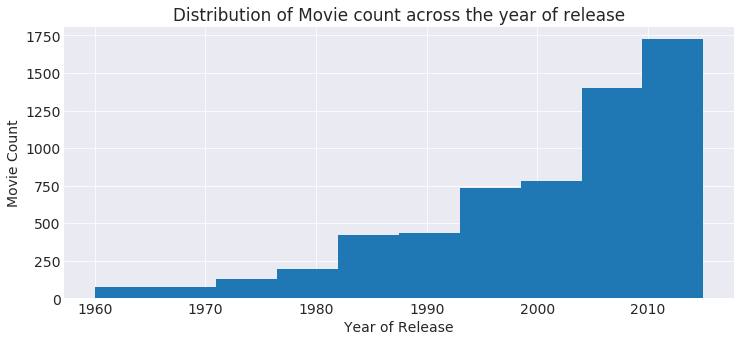

In [73]:
df3['release_year'].hist()
plt.title('Distribution of Movie count across the year of release')
plt.xlabel('Year of Release')
plt.ylabel('Movie Count');

The above chart shows the distribution of movie counts based on years. It can be observed that the number of movies released has been on a rise since 1960 and year above 2000 has the highest movie release rate.

2. Top 10 Year with highest/Lowest movie release

In [74]:
def movie_count(col):
    return df3[col].value_counts()
# we define a function to get the movie counts of columns based on its distinctness of values.

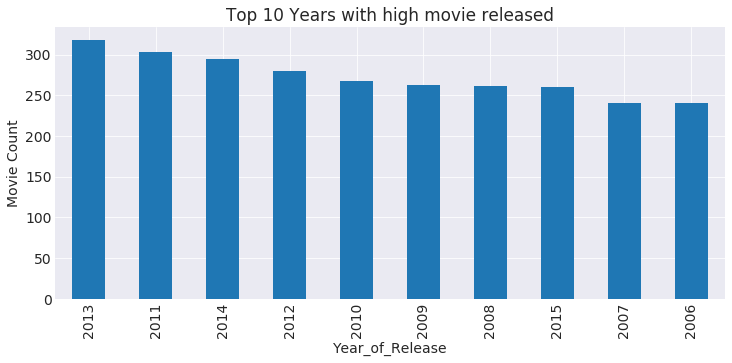

In [75]:
movie_count('release_year').head(10).plot(kind = 'bar')
plt.title('Top 10 Years with high movie released')
plt.xlabel('Year_of_Release')
plt.ylabel('Movie Count');

The chart above shows the year with the highest number of movie releases with 2011 & 2013 championing the years.

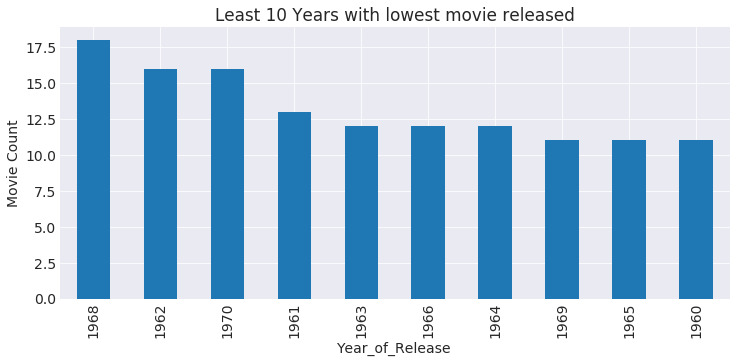

In [76]:
movie_count('release_year').tail(10).plot(kind = 'bar')
plt.title('Least 10 Years with lowest movie released')
plt.xlabel('Year_of_Release')
plt.ylabel('Movie Count');

The chart above shows the year with the lowest number of movie releases with 1960 & 1965 being the years with least movie release.

3. Director/ Genres/ production Companies associated with highest number of movie release

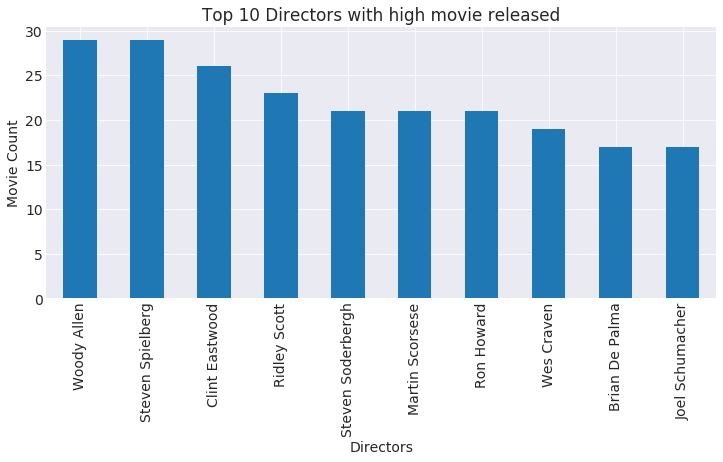

In [77]:
movie_count('director').head(10).plot(kind = 'bar')
plt.title('Top 10 Directors with high movie released')
plt.xlabel('Directors')
plt.ylabel('Movie Count');

Steven Spielberg & Woody Allen seems to be the directors with the highest number o movie release.

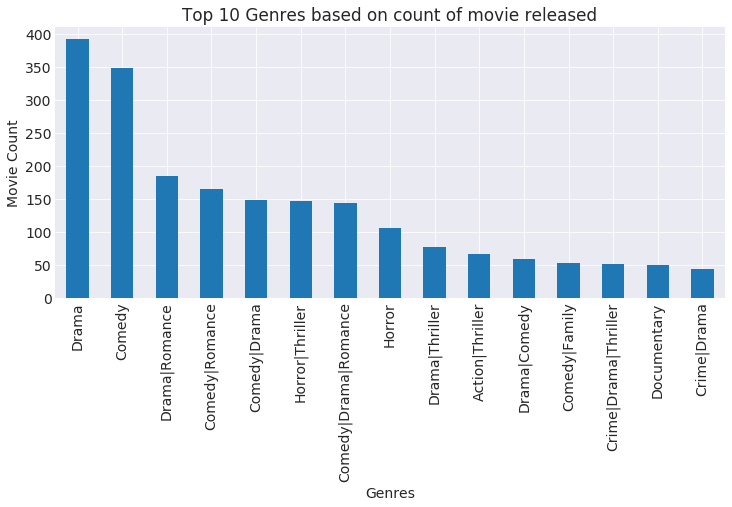

In [78]:
movie_count('genres').head(15).plot(kind = 'bar')
plt.title('Top 10 Genres based on count of movie released')
plt.xlabel('Genres')
plt.ylabel('Movie Count');

Drama and Comedy is the genre that is most populus among the movies released

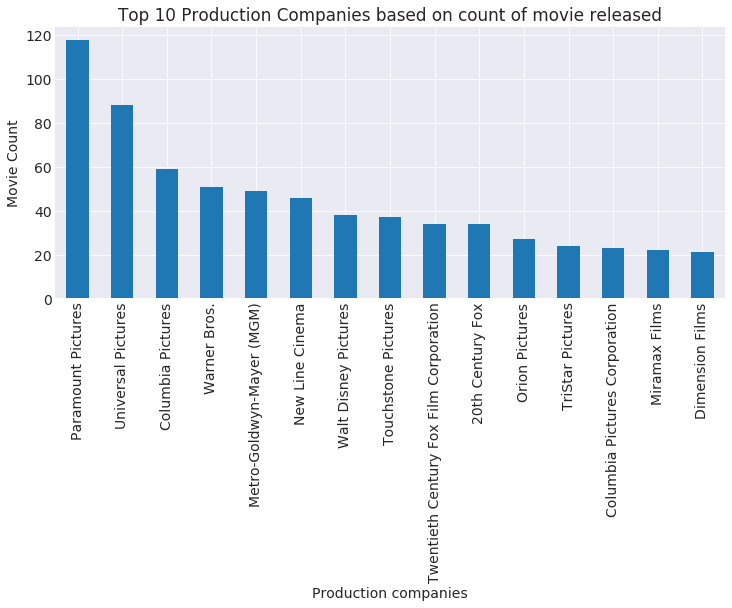

In [79]:
movie_count('production_companies').head(15).plot(kind = 'bar')
plt.title('Top 10 Production Companies based on count of movie released')
plt.xlabel('Production companies')
plt.ylabel('Movie Count');

Paramount Pictures and Universal Pictures leads the production companies in terms of movie release.

# Questions on VOTE COUNTS

1. Total yearly vote count of movies released in a particular year

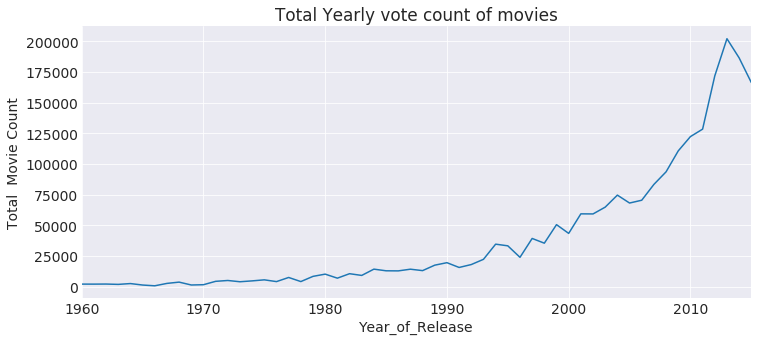

In [80]:
df3.groupby('release_year')['vote_count'].sum().plot()
plt.title('Total Yearly vote count of movies');
plt.xlabel('Year_of_Release')
plt.ylabel('Total  Movie Count');

There is high number of voters above Year 2000. it can be observed that year above 2000has minimum vote of atleaast 50000 votes

2. Movies with the highest/Least vote count

In [81]:
movies_votecount_df = df3.groupby('original_title')['vote_count'].sum().to_frame().sort_values('vote_count', ascending = False)

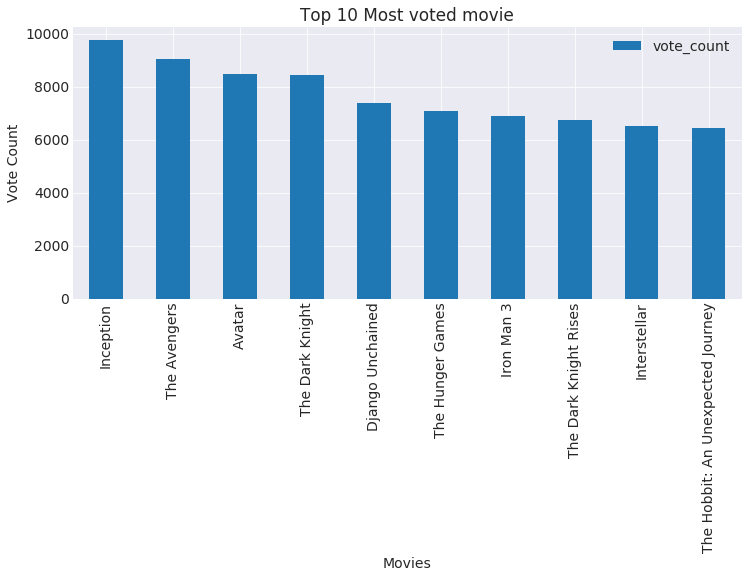

In [82]:
movies_votecount_df.head(10).plot(kind = 'bar')
plt.title('Top 10 Most voted movie');
plt.xlabel('Movies')
plt.ylabel('Vote Count');

This shows the top 10 movies with the most vote count.

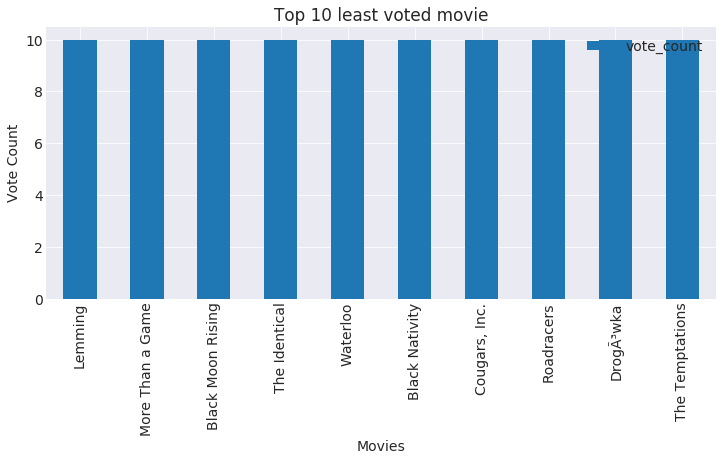

In [83]:
movies_votecount_df.tail(10).plot(kind = 'bar')
plt.title('Top 10 least voted movie');
plt.xlabel('Movies')
plt.ylabel('Vote Count');

This shows the bottom 10 movies with the most vote count. Each of these movies have vote count of 10

# Distribution based on VOTE AVERAGE

1. Distribution of vote_average

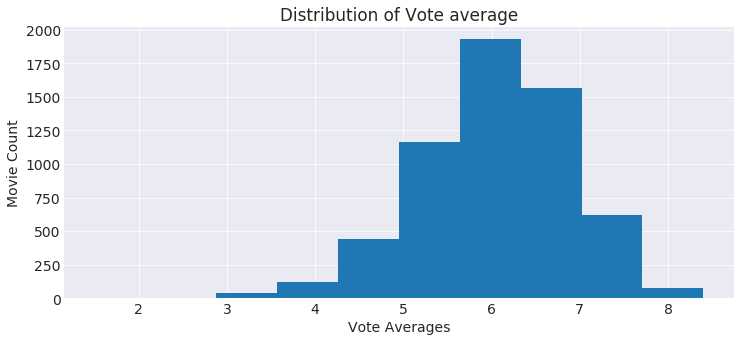

In [84]:
df3['vote_average'].hist()
plt.title('Distribution of Vote average');
plt.xlabel('Vote Averages')
plt.ylabel('Movie Count');

From the above chart, we can conclude that majority of the voters voted between 4.2 and 7.8. with approximately an average vote of 6 being the most common vote. 

2. Relationship between average_vote and year of release

In [85]:
def scatter_plot(df, x, y):
    return df.plot(x , y , kind = 'scatter')
def scatter_title(x,y) :
    return plt.title(f'Relationship between {x} and {y}')

# we define a function in order to create scatter plots and also scatter plots title.

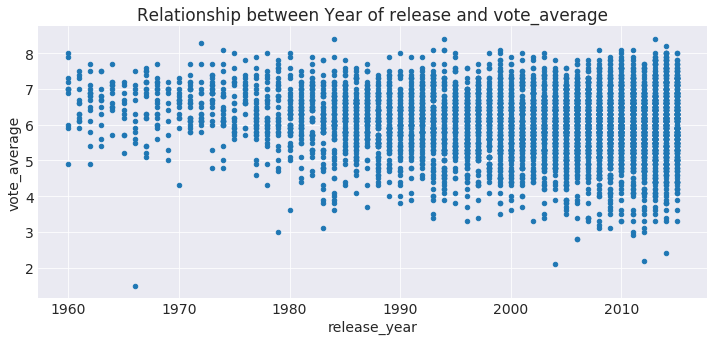

In [86]:
scatter_plot(df3, 'release_year', 'vote_average')
scatter_title('Year of release', 'vote_average');


The above chart shows that as the year increases from 1960. The average_vote participation also increases.

3. Top Movies with highest/Least average vote

In [87]:
movies_average_vote = df3.groupby('original_title')['vote_average'].sum().to_frame().sort_values('vote_average', ascending =False)

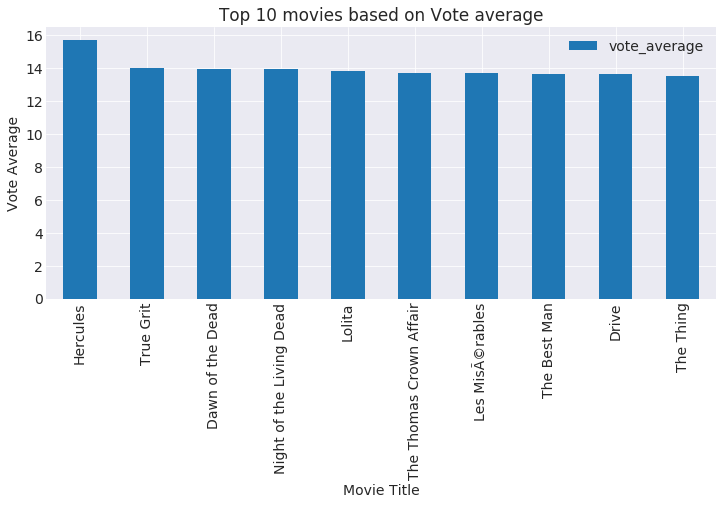

In [88]:
movies_average_vote.head(10).plot(kind = 'bar');
plt.title('Top 10 movies based on Vote average');
plt.xlabel('Movie Title')
plt.ylabel('Vote Average');

The above chart shows that Hercules, True Grit are the movies with the highest average vote

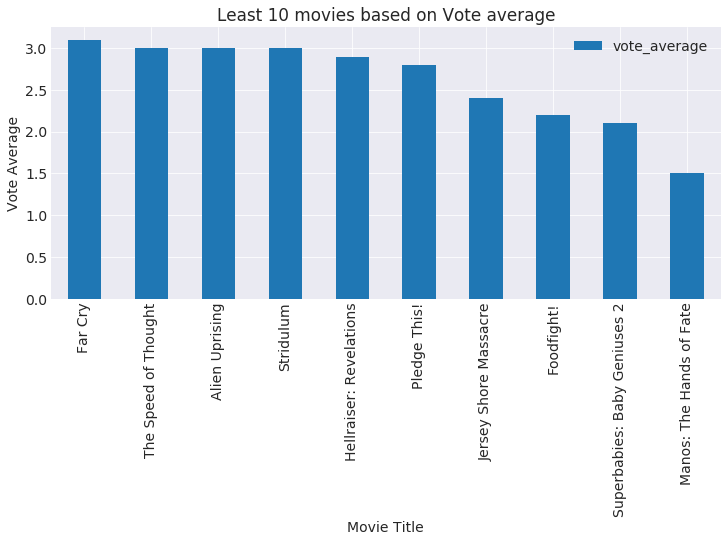

In [89]:
movies_average_vote.tail(10).plot(kind = 'bar')
plt.title('Least 10 movies based on Vote average')
plt.xlabel('Movie Title')
plt.ylabel('Vote Average');

The above chart shows the bottom 10 movies with the lowest average vote

4. Relationship between Vote count and vote average

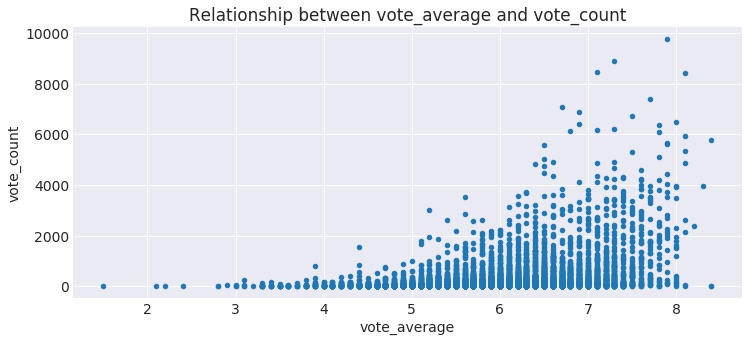

In [90]:
scatter_plot(df3, 'vote_average', 'vote_count')
scatter_title('vote_average', 'vote_count');

This shows the relationship between vote count and vote average. we can observe that most voters gave average vote of Atleast 5.

# Question on POPULARITY

1. Top 10 Most Popular Movies

In [91]:
popularity_of_movies = df3.groupby('original_title')['popularity'].sum().to_frame().sort_values('popularity', ascending =False)

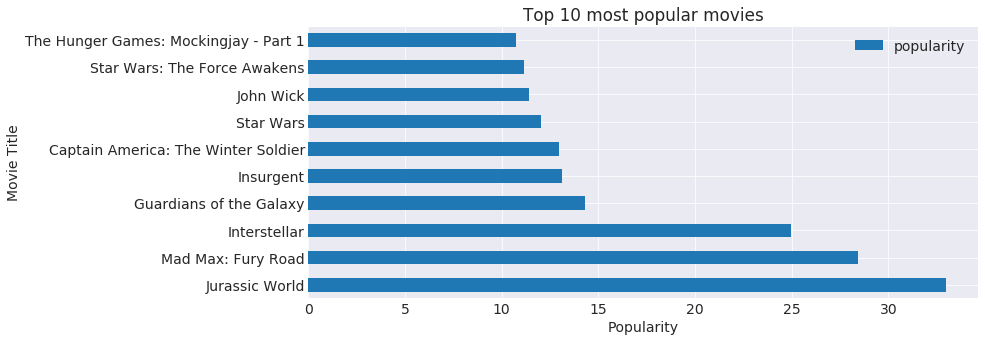

In [92]:
popularity_of_movies.head(10).plot(kind = 'barh')
plt.title('Top 10 most popular movies')
plt.xlabel('Popularity')
plt.ylabel('Movie Title');

The above shows that the Movie Jurassic World is the most popular movie.

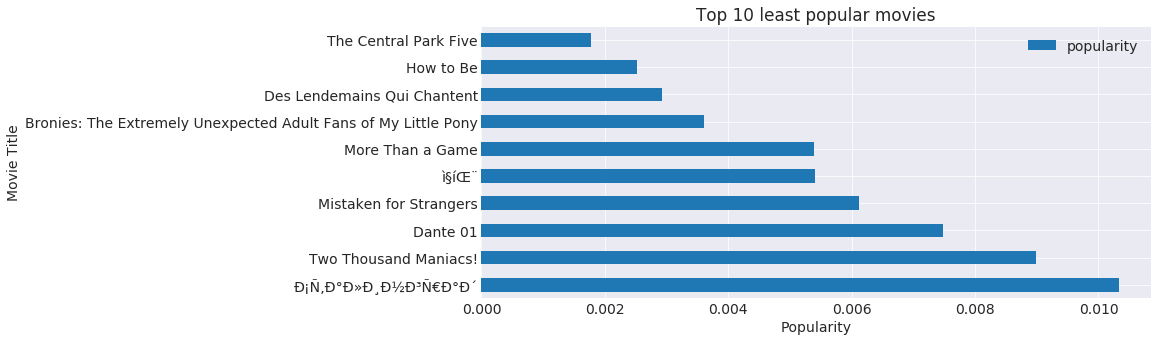

In [93]:
popularity_of_movies.tail(10).plot(kind = 'barh')
plt.title('Top 10 least popular movies')
plt.xlabel('Popularity')
plt.ylabel('Movie Title');

The above shows that the Movie The Central Park Five is the least popular movie.

# BUDGETS/ REVENUES

1. Distribution of budget across the years

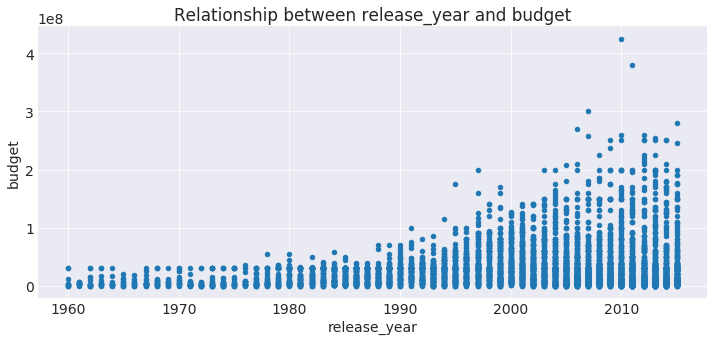

In [94]:
scatter_plot(df3, 'release_year', 'budget')
scatter_title('release_year', 'budget');

This shows that the budget for films has got to its maximum at years above 2000.

2. What's the relationship between Budget and Movie Popularity

In [95]:
budget_by_popularity_df = df3.groupby('original_title')['budget', 'popularity'].sum().sort_values('popularity', ascending =False)

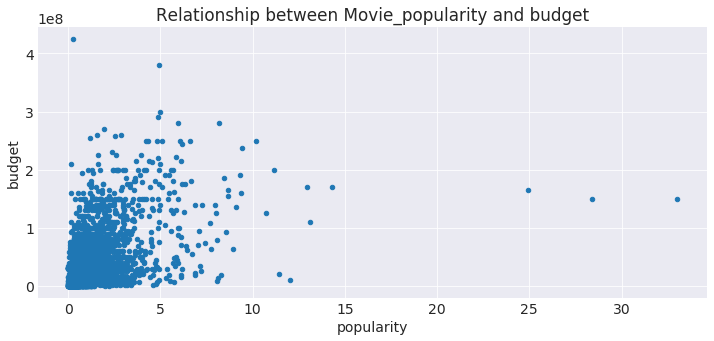

In [96]:
scatter_plot(budget_by_popularity_df, 'popularity', 'budget')
scatter_title('Movie_popularity', 'budget');

There seems not to be a significant relationship between budget and popularity but it can be observed that the budget amount for movies with popularity less than 5 falls bellow the average range of $300000000.

3. Top Years with highest/Least budget

In [97]:
yearly_budget = df3.groupby('release_year')['budget'].sum().to_frame().sort_values('budget')
yearly_budget.head(10)

,budget
release_year,
1961,4.613700e+07
1966,5.755480e+07
1965,7.020512e+07
1964,7.024627e+07
1969,7.289220e+07
1960,8.358317e+07
1972,9.780548e+07
1963,1.040946e+08
1971,1.067601e+08


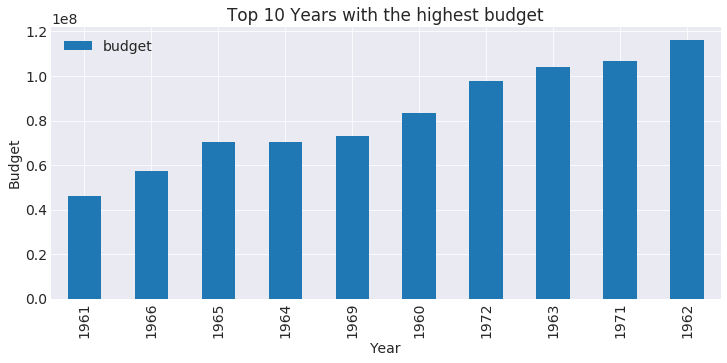

In [98]:
yearly_budget.head(10).plot(kind = 'bar')
plt.title('Top 10 Years with the highest budget')
plt.xlabel('Year')
plt.ylabel('Budget');

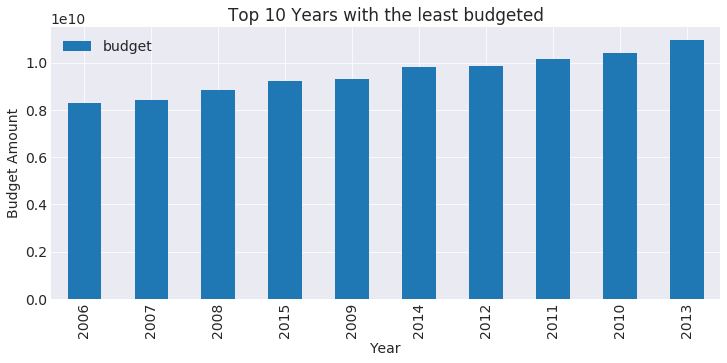

In [99]:
yearly_budget.tail(10).plot(kind = 'bar')
plt.title('Top 10 Years with the least budgeted')
plt.xlabel('Year')
plt.ylabel('Budget Amount');

The above chart shows the top 10/ Least 10 year with respect to budgets.

4. What's the relationship between Revenue and release year

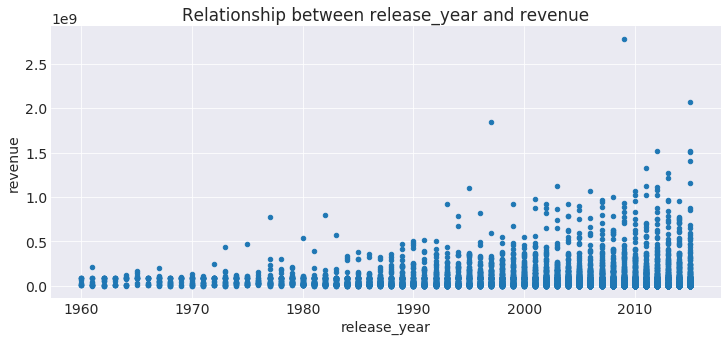

In [100]:
scatter_plot(df3, 'release_year', 'revenue')
scatter_title('release_year', 'revenue');

The chart shows that revenue generated by the movie industry increases with time increase

In [101]:
yearly_revenue = df3.groupby('release_year')['revenue'].sum().to_frame().sort_values('revenue')
yearly_revenue.sample(10)

,revenue
release_year,
2001,1.505670e+10
1962,8.407656e+08
1979,2.399293e+09
1972,1.298540e+09
1971,1.298033e+09
1978,2.246509e+09
1981,2.757041e+09
2006,1.964536e+10
1998,1.109149e+10


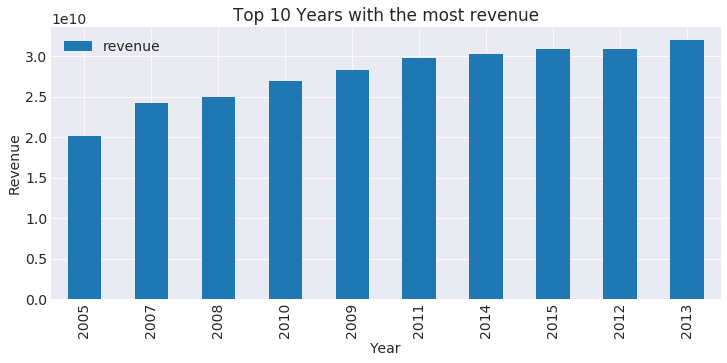

In [102]:
yearly_revenue.tail(10).plot(kind = 'bar')
plt.title('Top 10 Years with the most revenue')
plt.xlabel('Year')
plt.ylabel('Revenue');

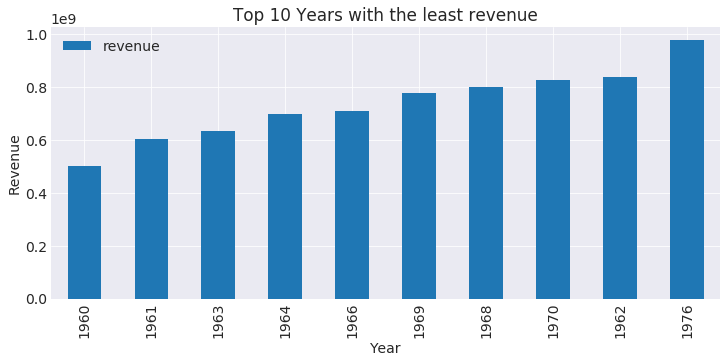

In [103]:
yearly_revenue.head(10).plot(kind = 'bar')
plt.title('Top 10 Years with the least revenue')
plt.xlabel('Year')
plt.ylabel('Revenue');

The above shows the year with the most and least revenue generated by the movie industry

5. Relationship between the budget and revenue acrross the years.

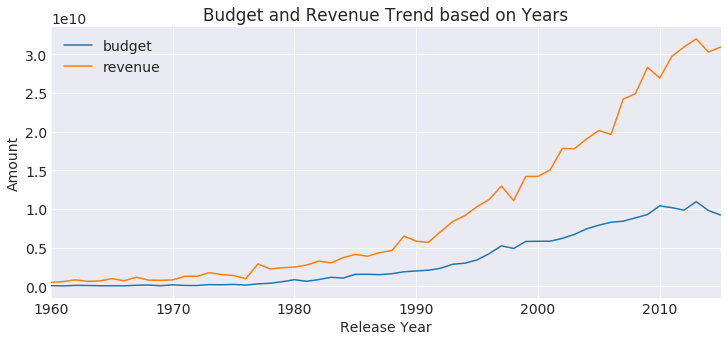

In [104]:
df3.groupby('release_year')['budget'].sum().plot()
df3.groupby('release_year')['revenue'].sum().plot()
plt.legend(loc = 'upper left')
plt.title('Budget and Revenue Trend based on Years')
plt.xlabel('Release Year')
plt.ylabel('Amount');

This shows that there has been increase in terms of budget and revenue generated by the movie industry. Based on this chart we can see that the Movie industry is in profit.

6. Relationship between Revenue and Popularity

In [105]:
revenue_by_popularity = df3.groupby('original_title')['revenue', 'popularity'].sum().sort_values('popularity', ascending =False)

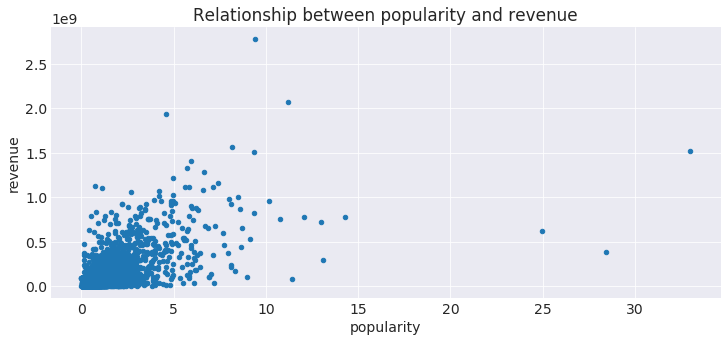

In [106]:
scatter_plot(revenue_by_popularity, 'popularity', 'revenue')
scatter_title('popularity', 'revenue');

There seems not to be a significant relationship between revenue and popularity but it can be observed that the revenue amount for movies with popularity less than 5 falls below the average range of $1B.

# PROFIT

In [107]:
df3['profit'] = df3.apply(lambda x : x['revenue'] - x['budget'], axis = 1)
df3.profit.head()

0    1.363529e+09
1    2.284364e+08
2    1.852382e+08
3    1.868178e+09
4    1.316249e+09
Name: profit, dtype: float64

In [108]:
df3.dtypes

popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
director                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
profit                         float64
dtype: object

In [109]:
df3.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit'],
      dtype='object')

1. Top/Least Years with Most Profit

In [110]:
df3.groupby('release_year')['profit'].sum().sort_values(ascending = False).head()

release_year
2015    2.173521e+10
2012    2.111743e+10
2013    2.106728e+10
2014    2.049790e+10
2011    1.958560e+10
Name: profit, dtype: float64

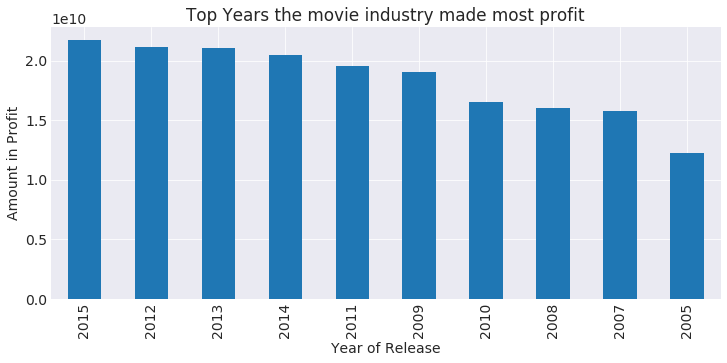

In [111]:
df3.groupby('release_year')['profit'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top Years the movie industry made most profit')
plt.xlabel('Year of Release')
plt.ylabel('Amount in Profit');

This shows the top 10 years that the movie industry made highest profit.

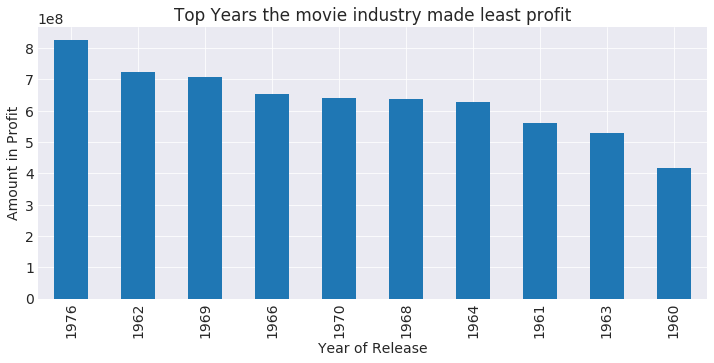

In [112]:
df3.groupby('release_year')['profit'].sum().sort_values(ascending = False).tail(10).plot(kind = 'bar')
plt.title('Top Years the movie industry made least profit')
plt.xlabel('Year of Release')
plt.ylabel('Amount in Profit');

This shows the bottom 10 years that the movie industry made least profit.

2. Top Movies with the highest Profit generated/ Loss suffered

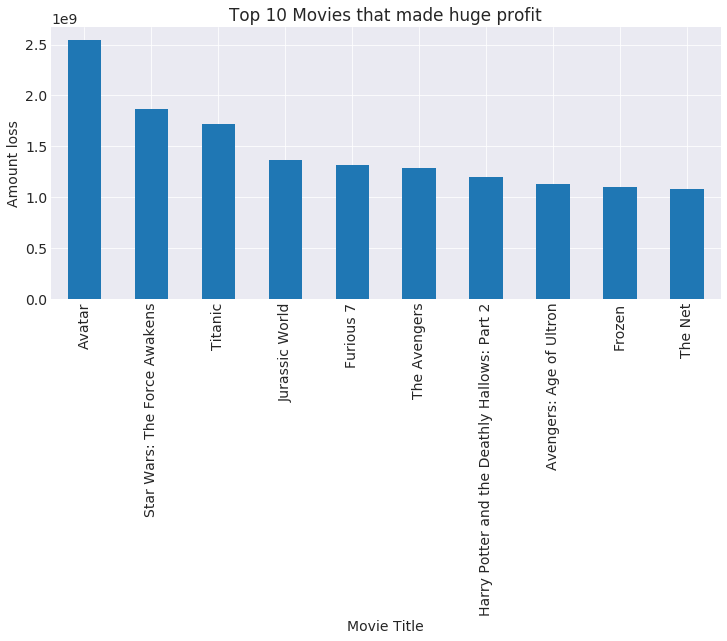

In [113]:
df3.groupby('original_title')['profit'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 Movies that made huge profit')
plt.xlabel('Movie Title')
plt.ylabel('Amount loss');

The chart shows the top 10 movies with the most profit and we can observe that avatar is the most profitable Movie.

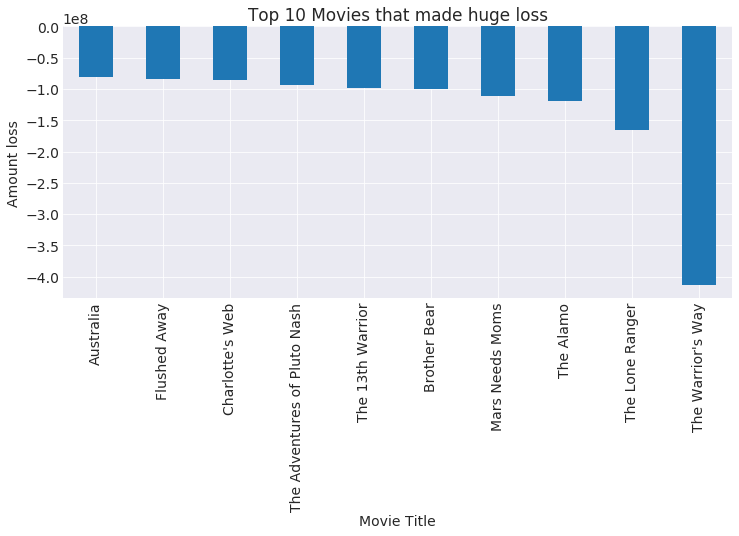

In [114]:
df3.groupby('original_title')['profit'].sum().sort_values(ascending = False).tail(10).plot(kind = 'bar')
plt.title('Top 10 Movies that made huge loss')
plt.xlabel('Movie Title')
plt.ylabel('Amount loss');

This shows the movies that generated the highest loss

3. Production Companies with the most Profit

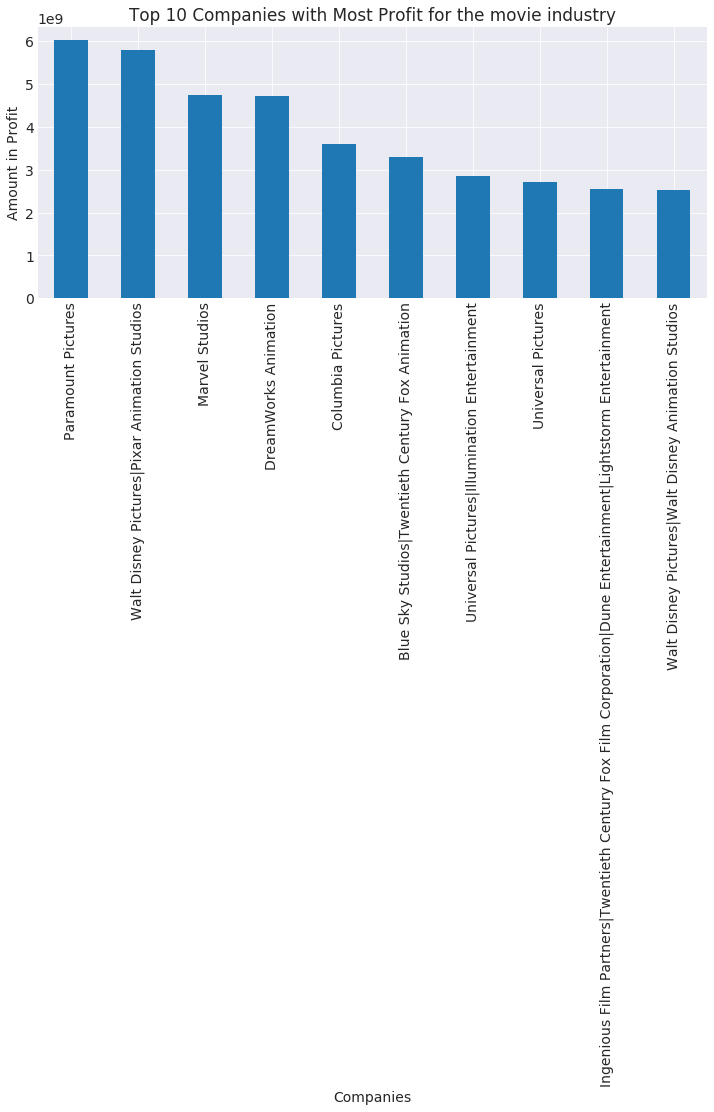

In [115]:
df3.groupby('production_companies')['profit'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 Companies with Most Profit for the movie industry')
plt.xlabel('Companies')
plt.ylabel('Amount in Profit');

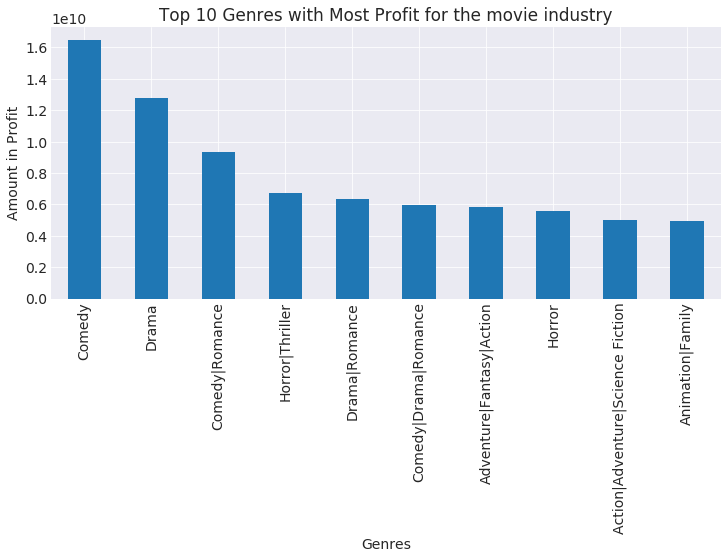

In [116]:
df3.groupby('genres')['profit'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 Genres with Most Profit for the movie industry')
plt.xlabel('Genres')
plt.ylabel('Amount in Profit');

# 2010 dollar inflation rate

1. Relationship between budget and budget_adj

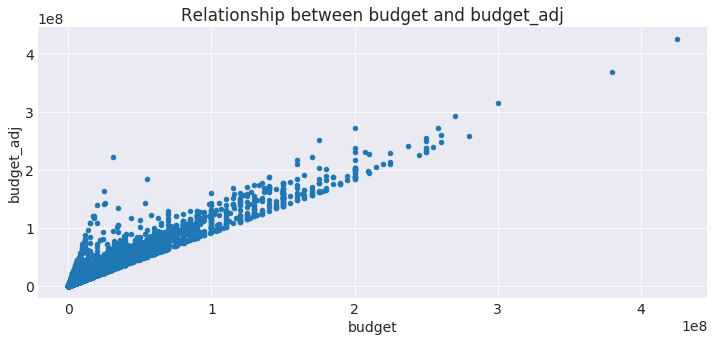

In [117]:
scatter_plot(df3,'budget', 'budget_adj')
scatter_title('budget', 'budget_adj');

The above shows that there is a high correlation between budget and budget_adj

2. How high is the budget inflation rate with regards to the 2010 dollar rate

In [118]:
df3['budget_infl'] = df3['budget_adj'] - df3['budget']
df3['budget_infl'].sort_values(ascending = False).head(10)

10443    1.904294e+08
10409    1.384191e+08
10758    1.288485e+08
10716    1.184113e+08
10656    1.176481e+08
10684    1.154092e+08
10457    1.040430e+08
10824    1.029243e+08
9887     1.025145e+08
10418    9.966175e+07
Name: budget_infl, dtype: float64

In [119]:
df3.groupby('release_year')['budget', 'budget_adj', 'budget_infl'].sum().sort_values('budget_infl')

,budget,budget_adj,budget_infl
release_year,,,
2015,9.222392e+09,8.941207e+09,-2.811857e+08
2014,9.815664e+09,9.573185e+09,-2.424786e+08
2013,1.095712e+10,1.071918e+10,-2.379347e+08
2012,9.857466e+09,9.762484e+09,-9.498192e+07
2011,1.017635e+10,1.014166e+10,-3.468699e+07
1960,8.358317e+07,2.364598e+08,1.528766e+08
1972,9.780548e+07,2.630150e+08,1.652095e+08
1975,2.408577e+08,4.495364e+08,2.086787e+08
1969,7.289220e+07,2.873437e+08,2.144515e+08


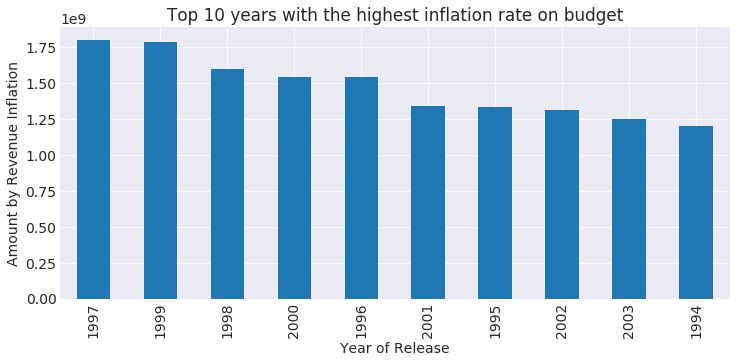

In [120]:
df3.groupby('release_year')['budget_infl'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 years with the highest inflation rate on budget')
plt.xlabel('Year of Release')
plt.ylabel('Amount by Revenue Inflation');

This shows the top 10 years that saves more money for budget compared to the 2010 dollar rate budget.

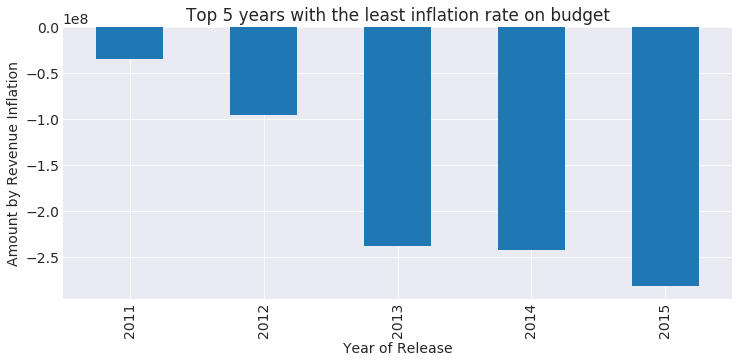

In [121]:
df3.groupby('release_year')['budget_infl'].sum().sort_values(ascending = False).tail(5).plot(kind = 'bar')
plt.title('Top 5 years with the least inflation rate on budget')
plt.xlabel('Year of Release')
plt.ylabel('Amount by Revenue Inflation');

This shows the bottom 5 years that losses more money for budget compared to the 2010 dollar rate budget.

3. Relationship between revenue and revenue_adj

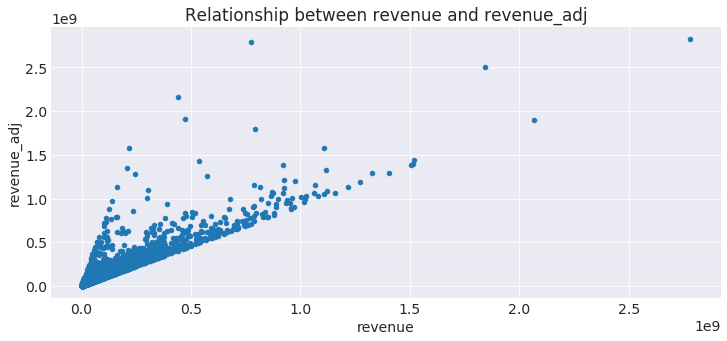

In [122]:
scatter_plot(df3,'revenue', 'revenue_adj')
scatter_title('revenue', 'revenue_adj');

4. How high is the inflation rate on the revenue comparing it to the 2010 dollar rate

In [123]:
df3['revenue_infl'] = df3['revenue_adj'] - df3['revenue']

In [124]:
df3.groupby('release_year')['revenue', 'revenue_adj', 'revenue_infl'].sum().sort_values('revenue_infl')

,revenue,revenue_adj,revenue_infl
release_year,,,
2015,3.095760e+10,3.003331e+10,-9.242881e+08
2014,3.031357e+10,3.012792e+10,-1.856436e+08
2013,3.202440e+10,3.256680e+10,5.424063e+08
2012,3.097489e+10,3.157462e+10,5.997312e+08
1966,7.099224e+08,1.375631e+09,6.657090e+08
1960,5.022540e+08,1.529899e+09,1.027645e+09
2011,2.976195e+10,3.079710e+10,1.035145e+09
1963,6.339662e+08,1.910335e+09,1.276369e+09
1969,7.798305e+08,2.141319e+09,1.361488e+09


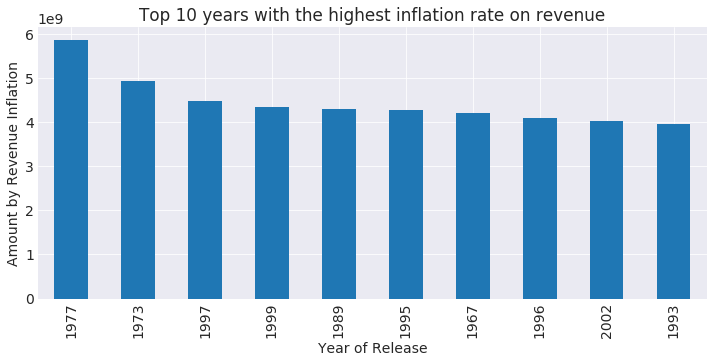

In [125]:
df3.groupby('release_year')['revenue_infl'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 years with the highest inflation rate on revenue')
plt.xlabel('Year of Release')
plt.ylabel('Amount by Revenue Inflation');

This shows how high the 2010 dollar rate is greater than the revenue generated in the above years. 

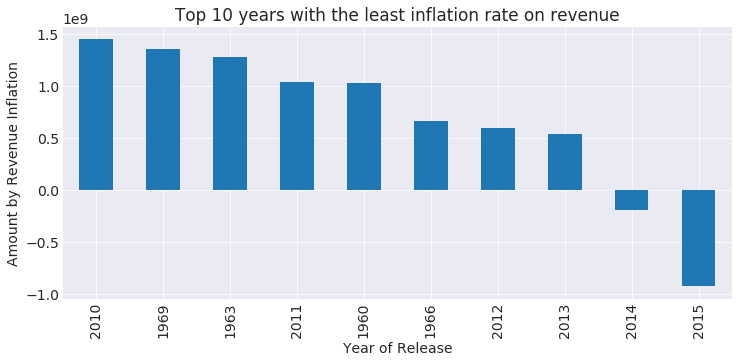

In [126]:
df3.groupby('release_year')['revenue_infl'].sum().sort_values(ascending = False).tail(10).plot(kind = 'bar')
plt.title('Top 10 years with the least inflation rate on revenue')
plt.xlabel('Year of Release')
plt.ylabel('Amount by Revenue Inflation');

This shows how high  the revenue generated in the above years as compared to the 2010 dollar rate is greater than

# RUNTIME

1. Relationship between runtime and budget

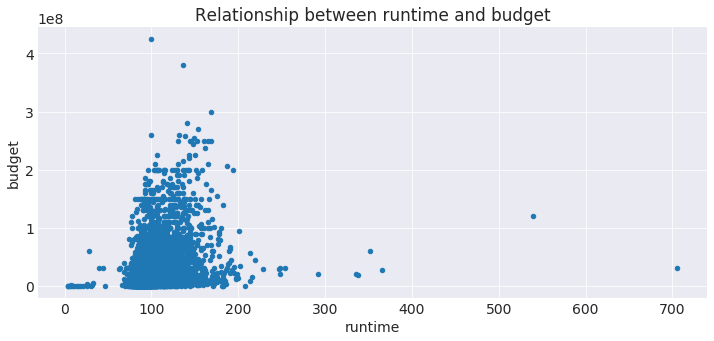

In [127]:
scatter_plot(df3,'runtime', 'budget')
scatter_title('runtime', 'budget');

Most movies have the average runtime between 80 and 200 and has a budget range less than $200M.

2. Relationship between runtime and revenue

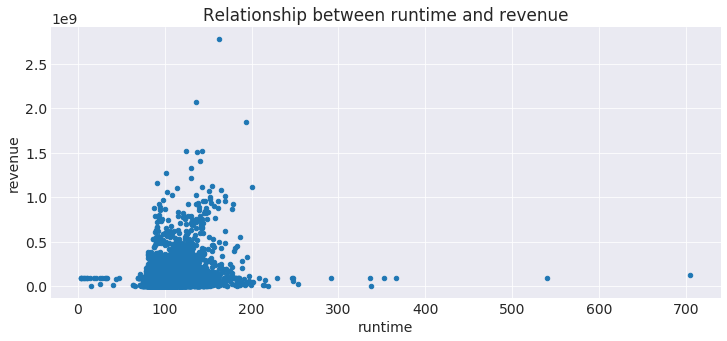

In [128]:
scatter_plot(df3,'runtime', 'revenue')
scatter_title('runtime', 'revenue');

2. Most movie runtime between 80 and 200 generates revenue below $1B

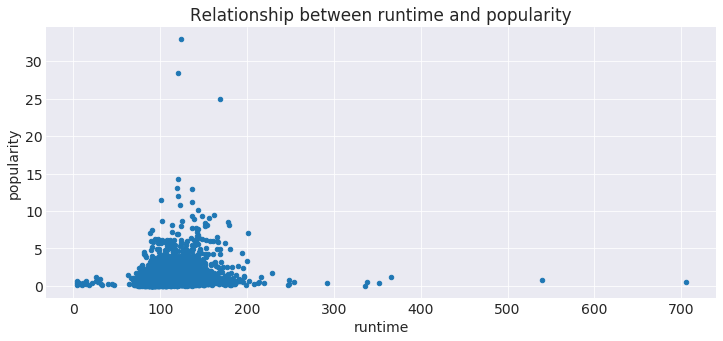

In [129]:
scatter_plot(df3,'runtime', 'popularity')
scatter_title('runtime', 'popularity');

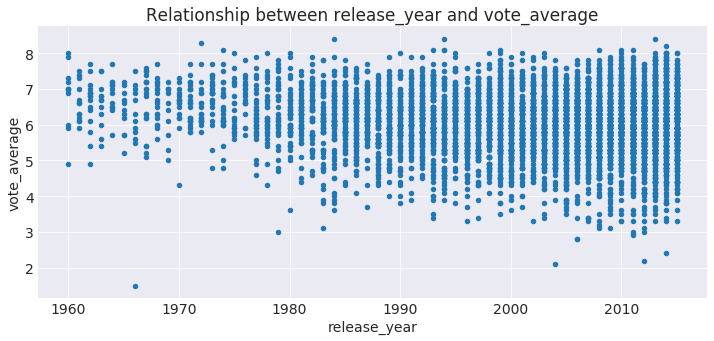

In [130]:
scatter_plot(df3, 'release_year', 'vote_average')
scatter_title('release_year', 'vote_average');

Movies in the range 80-200 receives the most vote.

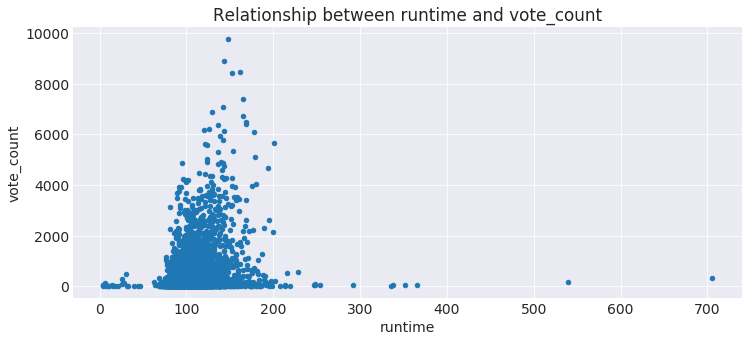

In [131]:
scatter_plot(df3, 'runtime', 'vote_count')
scatter_title('runtime', 'vote_count');

5. Longest movies

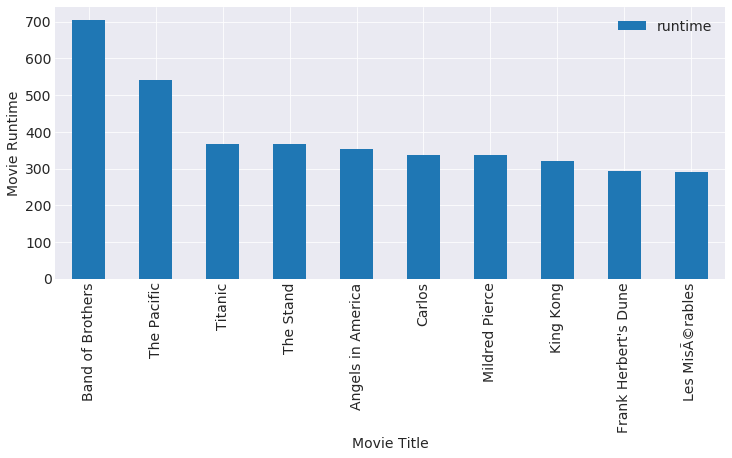

In [132]:
longest_movies = df3.groupby('original_title')['runtime'].sum().to_frame().sort_values('runtime', ascending = False)
longest_movies.head(10).plot(kind = 'bar')
plt.ylabel('Movie Runtime')
plt.xlabel('Movie Title');

This shows the top 10 movies based on their duration length. the movie Band of Brothers has the highest runtime

6. Yearly_average based on runtime

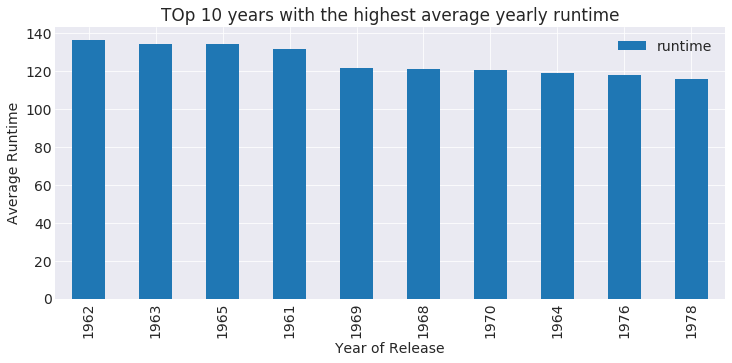

In [133]:
average_movies_runtime = df3.groupby('release_year')['runtime'].mean().to_frame().sort_values('runtime', ascending = False)
average_movies_runtime.head(10).plot(kind = 'bar')
plt.title('TOp 10 years with the highest average yearly runtime')
plt.ylabel('Average Runtime')
plt.xlabel('Year of Release');
# shows the average runtime of movies by years.

In [134]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

# Conclusions

From the data, We could conclude that the movie industry is a profitable industry as there has been profit rise since 1960.
Also, There are more movies done in the recent years than in the 60s,70s,80s.
There are more lengthy movies in the 60s, 70s, 80s than recent years.
The movie that have drama and comedy genres gives the most profit to the Movie Industry.
Movie popularity, Movie Vote Counts increases across the years.

# Limitations
1. There are many zero values for budget and revenue which if they were recorded correctly, it will give us more guided information on our datasets.
2. Information on homepage seems not to be recorded as having such will help us know the homepage most people will visit to get information on movies.
3. The amount of unrecoreded values in some columns that were dropped is also a limitation to getting a more defined result.

# Resources:  N/A

In [135]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0